In [2]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_prepare

In [11]:
post, thread=data_prepare.load_train_data()
#post_test, thread_test=data_prepare.load_test_data()
label_map=data_prepare.load_label_map()

In [3]:
lbl_stats = thread.groupby(['thread_label', 'thread_label_id']).thread_replies.agg(['count', 'sum'])
lbl_stats.columns = ['threads', 'posts']
lbl_stats['posts'] += lbl_stats.threads
lbl_stats['avg posts per thread'] = (lbl_stats['posts'] / lbl_stats['threads']).astype(int)
lbl_stats

,,threads,posts,avg posts per thread
thread_label,thread_label_id,,,
bastard,0,14,5411,386
beginners-mafia,1,23,10242,445
byor,2,13,10609,816
classic,3,21,7021,334
closed-setup,4,36,13828,384
cybrid,5,3,958,319
kotm,6,2,1719,859
non-mafia-game,7,2,673,336
other,8,201,28639,142


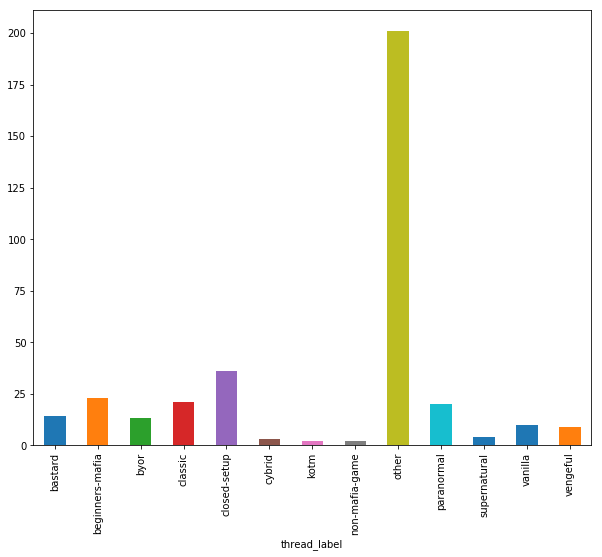

In [4]:
fig = plt.figure(figsize=(10,8))
thread.groupby('thread_label').thread_replies.count().plot.bar(ylim=0)
plt.show()

In [5]:
lbl_stats[lbl_stats["threads"]<5]

,,threads,posts,avg posts per thread
thread_label,thread_label_id,,,
cybrid,5,3,958,319
kotm,6,2,1719,859
non-mafia-game,7,2,673,336
supernatural,10,4,1565,391


In [6]:
label_map.loc[lbl_stats[lbl_stats["threads"]<5].index.get_level_values('thread_label').tolist()]["description"].tolist()

['A custom, titled mafia game with multiple "evil" factions and roles, with a sci-fi flavor.',
 '"King of the Mafia": multiple mafia mini-games (of the Kingmaker format) to determine the title of the subforum.',
 'Games which are sufficiently different from Mafia to be "related", but not counted as actual Mafia games.',
 'A custom, titled mafia game with hidden (but consistent) roles and a "supernatural beings" theme.']

In [16]:
quotes=post[post["quotes"]!="[]"]
print(quotes.iloc[0]["quotes"],"\n",quotes.iloc[0]["text"])

['Well, the game\'s started now.\xa0 Good luck, Liberals .Warning: Setup may contain copious amounts of fun.'] 



*Dun dun DUNNNNN*


In [17]:
quotes["quotes"]=quotes["quotes"].apply(lambda x: x.replace('[','').replace(']',''))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
print(len(thread), len(post))

358 97539


In [12]:
post

,thread_num,user,text,quotes
0,45016,Mephansteras,"Basically, this is where we talk about what ga...",
1,45016,dakarian,The currently running or about to run games (i...,
2,45016,webadict,And mine's started.\r\r\r\n\r\r\r\nI'll try to...,
3,45016,ExKirby,"Mine needs 14 players, not 13.",
4,45016,RedWarrior0,Mine can wait a bit. BYORPE is a problem as it...,
5,45016,dakarian,HIGHLY depends. Going through each game to fi...,
6,45016,dakarian,Guys..no.. I'm not taking over this task I a...,
7,45016,Mephansteras,"I don't mind keeping the OP updated, but it'd ...",
8,45016,Rysith,I have a 12-player semi-bastard setup ready to...,
9,45016,dakarian,That'll work. Probably just when major events...,


In [95]:
#unique_users = pd.DataFrame(post.groupby(['thread_num','user']).size(),columns=['thread_num', 'user', 'number_of_replies'])
unique_users = post.groupby(['thread_num','user']).size()

In [ ]:
unique_users.index

In [97]:
m = pd.MultiIndex(unique_users.index)

TypeError: Must pass both levels and labels